<a href="https://colab.research.google.com/github/Sanjeevkumar2004/Heart-Disease/blob/main/HDP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
data = pd.read_csv(r"/heart_2022_no_nans.csv")

In [22]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [23]:
data.fillna(method='ffill', inplace=True)

/tmp/ipython-input-2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [24]:
label_encoder = LabelEncoder()
categorical_columns = ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'RaceEthnicityCategory', 'AgeCategory', 'SmokerStatus']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

object_columns = data.select_dtypes(include='object').columns

for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [25]:
X = data.drop(['HadHeartAttack'], axis=1)
y = data['HadHeartAttack']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94479 entries, 0 to 94478
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      94479 non-null  int64  
 1   Sex                        94479 non-null  int64  
 2   GeneralHealth              94479 non-null  int64  
 3   PhysicalHealthDays         94479 non-null  float64
 4   MentalHealthDays           94479 non-null  float64
 5   LastCheckupTime            94479 non-null  int64  
 6   PhysicalActivities         94479 non-null  int64  
 7   SleepHours                 94479 non-null  float64
 8   RemovedTeeth               94479 non-null  int64  
 9   HadHeartAttack             94479 non-null  int64  
 10  HadAngina                  94479 non-null  int64  
 11  HadStroke                  94479 non-null  int64  
 12  HadAsthma                  94479 non-null  int64  
 13  HadSkinCancer              94479 non-null  int

In [30]:
#y_pred_prob = model.predict(X_test).ravel()
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred_prob = model.predict(X_test).ravel()


591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

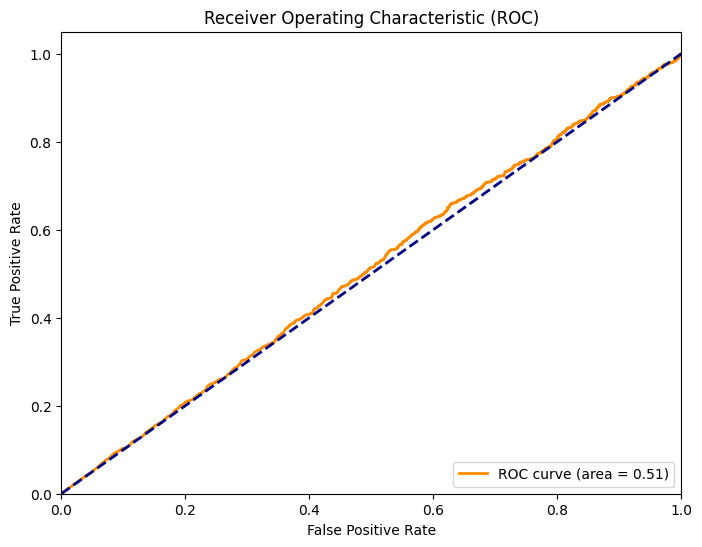

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()